# Data Loading and Preproceesing

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Visualization (optional for checks)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
# Load the Parkinson's UPDRS dataset
df = pd.read_csv("parkinsons_updrs (1).csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Types and Non-null Values:")
print(df.info())

# Display first few rows
print (df.head())


Dataset Shape: (5875, 22)

Data Types and Non-null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float6

In [3]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nDuplicate Rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()



Missing Values per Column:
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

Duplicate Rows: 0


In [4]:
# Ensure sex is integer type
df['sex'] = df['sex'].astype(int)


# Drop irrelevant identifiers
X = df.drop(columns=['subject#', 'motor_UPDRS', 'total_UPDRS'])
y = df['total_UPDRS']

print("Feature Set Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Set Shape: (5875, 19)
Target Shape: (5875,)


# EDA

Dataset Loaded Successfully.
Shape of Dataset: (5875, 22)

First Five Rows:
   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0    5.64310     28.19900     34.39800    0.00662   
1         1   72    0   12.66600     28.44700     34.89400    0.00300   
2         1   72    0   19.68100     28.69500     35.38900    0.00481   
3         1   72    0   25.64700     28.90500     35.81000    0.00528   
4         1   72    0   33.64200     29.18700     36.37500    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0      0.00003     0.00401      0.00317  ...      0.23000       0.01438   
1      0.00002     0.00132      0.00150  ...      0.17900       0.00994   
2      0.00002     0.00205      0.00208  ...      0.18100       0.00734   
3      0.00003     0.00191      0.00264  ...      0.32700       0.01106   
4      0.00002     0.00093      0.00130  ...      0.17600       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Sh

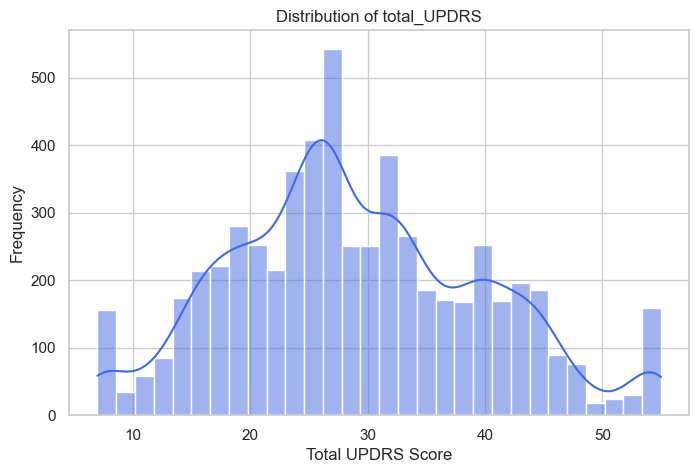

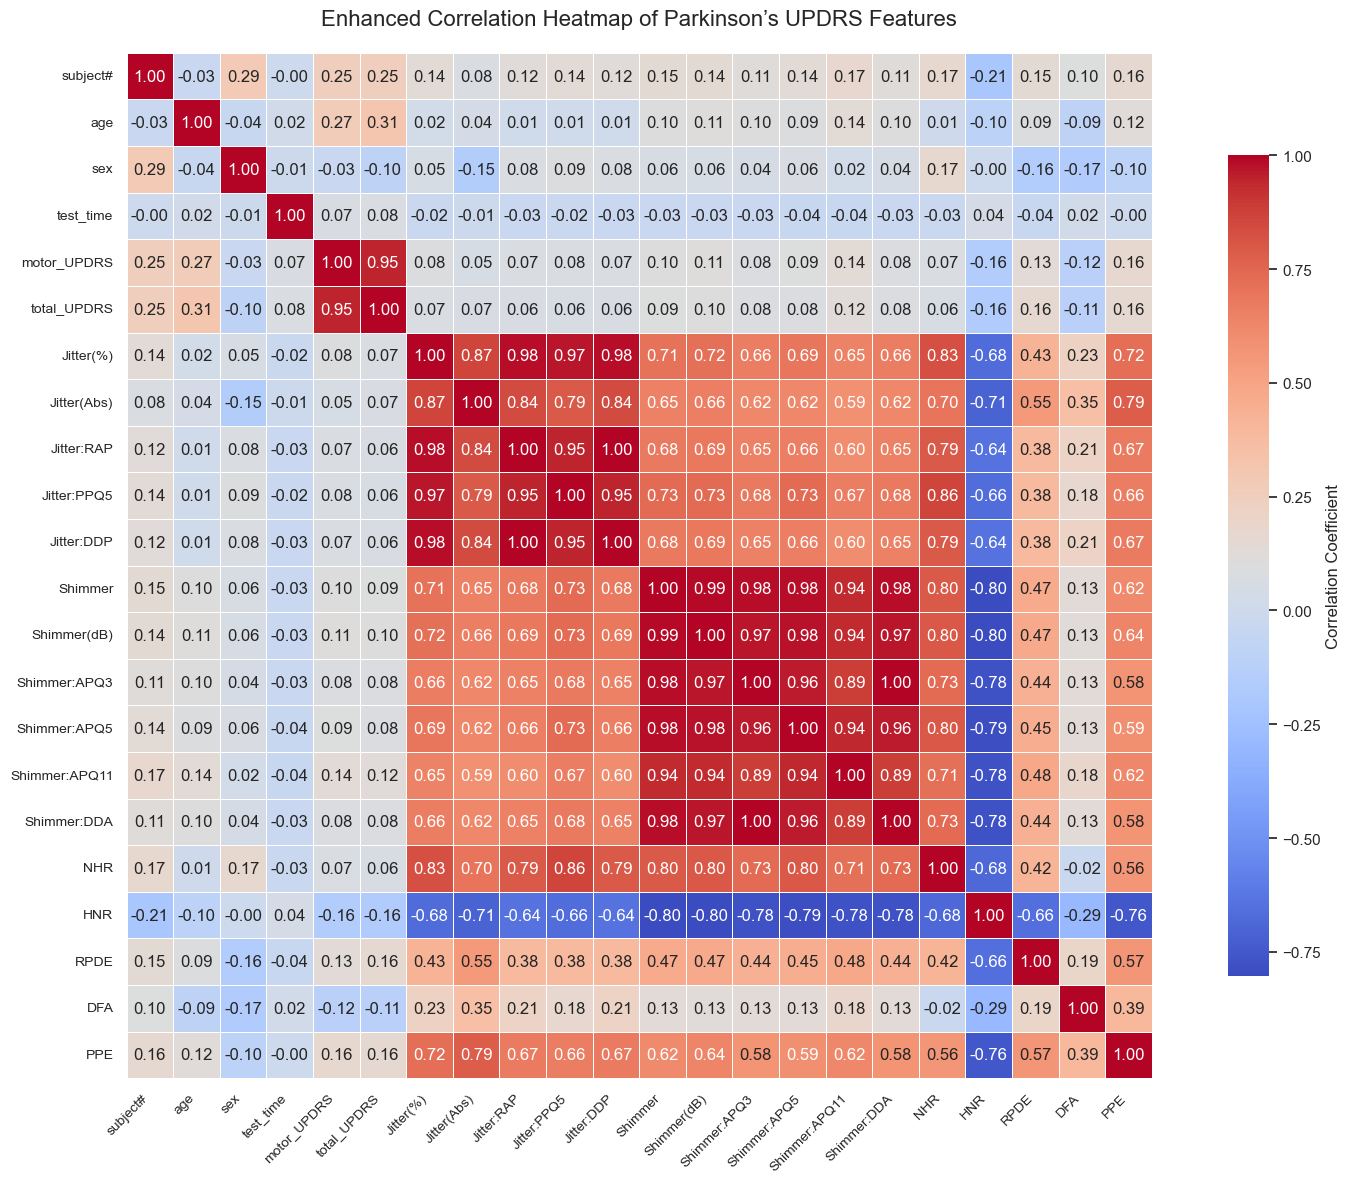


Top 10 Features Correlated with total_UPDRS:
total_UPDRS     1.00000
motor_UPDRS     0.94723
age             0.31029
subject#        0.25364
RPDE            0.15690
PPE             0.15619
Shimmer:APQ11   0.12084
Shimmer(dB)     0.09879
Shimmer         0.09214
Shimmer:APQ5    0.08347
Name: total_UPDRS, dtype: float64


In [5]:
# ---------------------------------------------
# EDA for Parkinson’s UPDRS Dataset
# ---------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display and style
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set(style="whitegrid", context="notebook")

# ---------------------------------------------
# Step 1: Load the Dataset
# ---------------------------------------------
df = pd.read_csv("parkinsons_updrs (1).csv")

print("Dataset Loaded Successfully.")
print("Shape of Dataset:", df.shape)
print("\nFirst Five Rows:")
print(df.head())

# ---------------------------------------------
# Step 2: Summary Statistics
# ---------------------------------------------
print("\nSummary Statistics:")
print(df.describe())

# ---------------------------------------------
# Step 3: Distribution of Target Variable
# ---------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df['total_UPDRS'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of total_UPDRS")
plt.xlabel("Total UPDRS Score")
plt.ylabel("Frequency")
plt.show()

# ---------------------------------------------
# Step 4: Correlation Analysis
# ---------------------------------------------
# Compute correlation matrix
corr_matrix = df.corr()

# Set figure size and font scaling
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.0)

# Generate the heatmap
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",          # Diverging color map for contrast
    annot=True,               # Display correlation coefficients
    fmt=".2f",                # Format for numbers
    linewidths=0.5,           # Light grid lines for clarity
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    square=True               # Make cells square-shaped
)

# Improve title and label appearance
plt.title("Enhanced Correlation Heatmap of Parkinson’s UPDRS Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

# Show correlation with target
corr_target = corr_matrix['total_UPDRS'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with total_UPDRS:")
print(corr_target.head(10))



# Model Evaluation 

Training Set: (4700, 19)
Testing Set: (1175, 19)

--- Linear Regression Evaluation ---
Mean Absolute Error (MAE): 8.0538
Root Mean Squared Error (RMSE): 9.6595
R² Score: 0.1580

--- Decision Tree Regressor Evaluation ---
Mean Absolute Error (MAE): 2.6048
Root Mean Squared Error (RMSE): 4.3079
R² Score: 0.8325


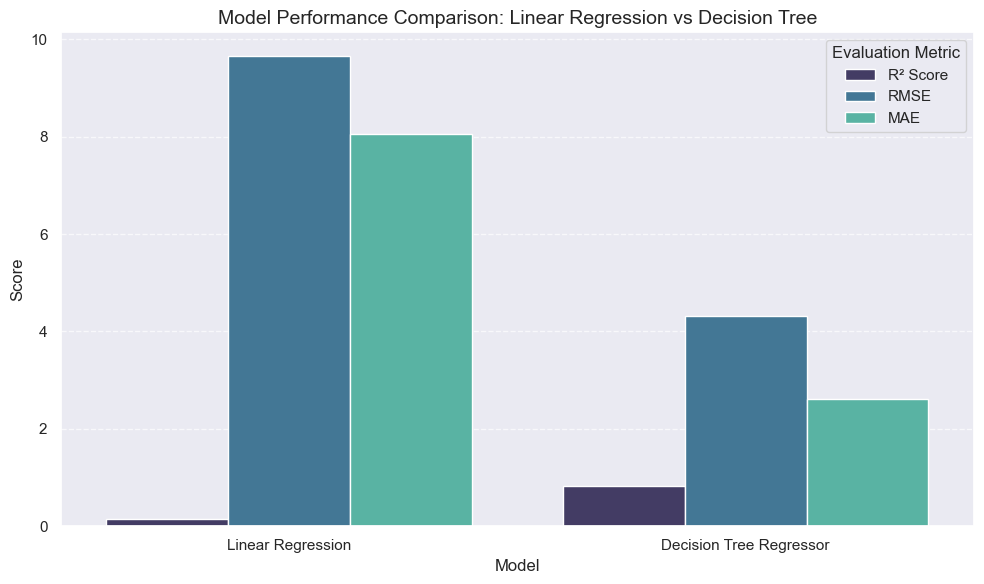

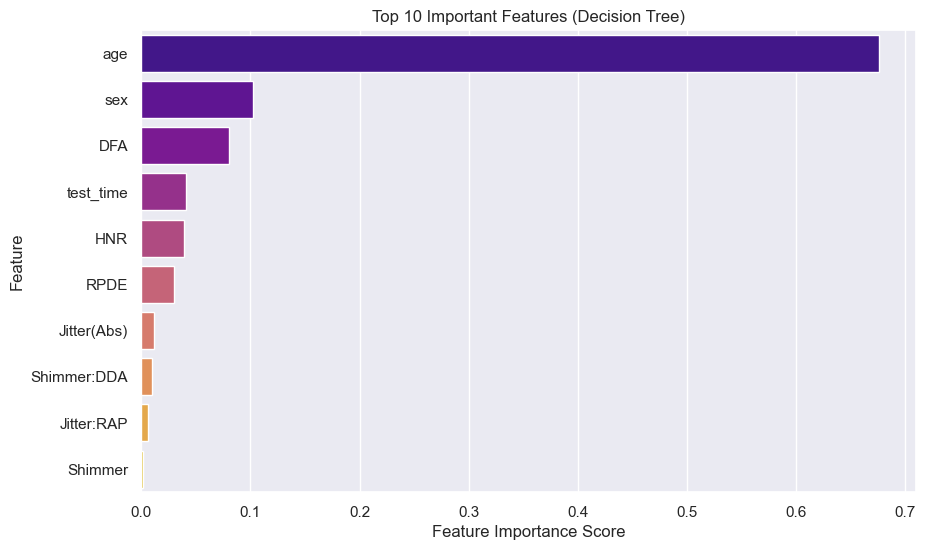

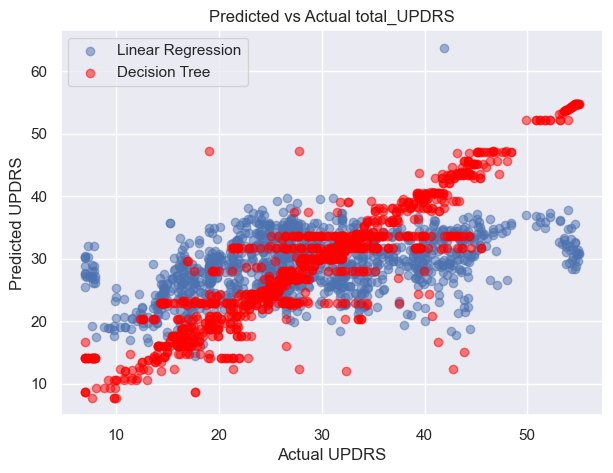


Model comparison completed successfully.


In [6]:
# ---------------------------------------------
# Machine Learning Models: Decision Tree vs Linear Regression
# ---------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Step 1: Define Features and Target Variable
# ---------------------------------------------
X = df.drop(columns=['subject#', 'motor_UPDRS', 'total_UPDRS'])
y = df['total_UPDRS']

# ---------------------------------------------
# Step 2: Split the Dataset
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

# ---------------------------------------------
# Step 3: Feature Scaling
# ---------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------
# Step 4: Linear Regression Model
# ---------------------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- Linear Regression Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# ---------------------------------------------
# Step 5: Decision Tree Regressor Model
# ---------------------------------------------
dt_model = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=5)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation Metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

print("\n--- Decision Tree Regressor Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

# ---------------------------------------------
# Step 6: Combined Model Comparison Visualization
# ---------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a melted DataFrame for better plotting
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regressor"],
    "R² Score": [r2_lr, r2_dt],
    "RMSE": [rmse_lr, rmse_dt],
    "MAE": [mae_lr, mae_dt]
})

# Melt the dataframe for seaborn grouped barplot
results_melted = results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot all metrics together
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="mako")

# Customize plot
plt.title("Model Performance Comparison: Linear Regression vs Decision Tree", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Evaluation Metric", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Step 7: Feature Importance (Decision Tree)
# ---------------------------------------------
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette="plasma")
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# ---------------------------------------------
# Step 8: Prediction Comparison Visualization
# ---------------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_dt, alpha=0.5, label="Decision Tree", color='red')
plt.title("Predicted vs Actual total_UPDRS")
plt.xlabel("Actual UPDRS")
plt.ylabel("Predicted UPDRS")
plt.legend()
plt.show()

print("\nModel comparison completed successfully.")
